In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Advertising/Advertising_data.csv")

In [4]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


# **Simple Linear Regression**
### Predicting sales from Television advertisements

In [6]:
#Initializing the variables
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

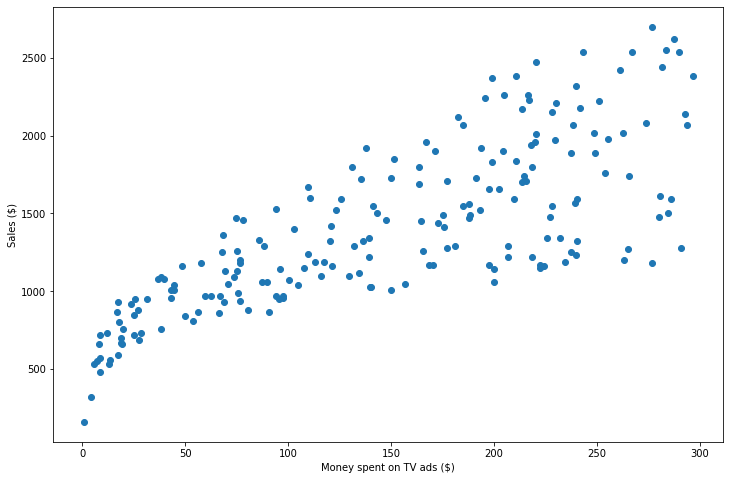

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = reg.predict(X_test)


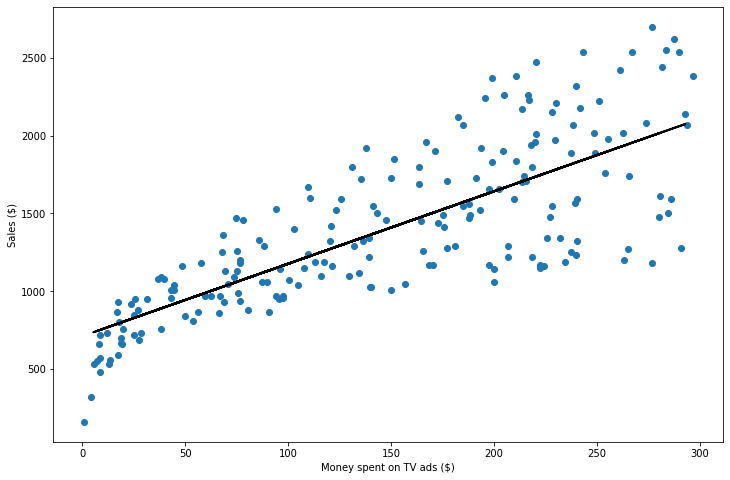

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.plot(
    X_test,
    y_pred,
    c='black',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [30]:
print("Coefficient = ",reg.coef_)
print("Intercept = ",reg.intercept_)
from sklearn.metrics import r2_score
print("R2 Score = %.2f"%r2_score(y_test, y_pred))
print("Sales = %.2f"%reg.predict([[450]]))

Coefficient =  [[4.65297337]]
Intercept =  [711.96384306]
R2 Score = 0.68
Sales = 2805.80


# **Multiple Linear Regression**
### Predicting Sales from all advertisements

In [66]:
X = data.drop(['sales'], axis=1).values
y = data['sales'].values.reshape(-1,1)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred=regressor.predict(X_test)

In [75]:
print("Coefficient = ",regressor.coef_)
print("Intercept = ",regressor.intercept_)
from sklearn.metrics import r2_score
print("R2 Score = %.2f"%r2_score(y_test, y_pred))
print("Sales = %.2f"%regressor.predict([[45,50,75]]))

Coefficient =  [[ 4.47295175 18.91950542  0.27611143]]
Intercept =  [297.90673381]
R2 Score = 0.90
Sales = 1465.87


In [76]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = regressor.predict([[tv,radio,newspaper]])
print("Sales = %.2f"%output)

Enter the ammount you will invest on:
TV : 100
Radio : 100
Newspaper : 100
Sales = 2664.76


In [78]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [77]:
!cp -r "/content/finalized_model.sav" "/content/drive/MyDrive/Advertising"